# MATH 210 Introduction to Mathematical Computing

## October 22, 2018

* Example: Bessel Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
%matplotlib inline

## Example: Bessel Function

For each $n$, there is a [Bessel function](https://en.wikipedia.org/wiki/Bessel_function) of the first kind $J_n(x)$. Bessel functions can be defined in several different ways and they play an important role when finding solutions of [Laplace's equation](https://en.wikipedia.org/wiki/Laplace%27s_equation). Let's look at the integral definition:

$$
J_n(x) = \frac{1}{\pi} \int_0^{\pi} \cos(n t - x\sin(t)) \, dt
$$

Write a function called `bessel` which takes 3 parameters `x`, `n` and `max_error` (default value $0.001$) and returns $J_n(x)$ with error less than `max_error`. To compute $J_n(x)$ using the trapezoif rule, we need to find a bound on the second derivative of the integrand.

Compute derivatives:

\begin{align}
f(t) &= \frac{1}{\pi} \cos(nt - x \sin(t)) \\
f'(t) &= -\frac{1}{\pi}\sin(nt - x \sin(t))(n - x \cos(t)) \\
f''(t) &= -\frac{1}{\pi}\cos(nt - x \sin(t))(n - x \cos(t))^2-\frac{1}{\pi}\sin(nt - x \sin(t))(x \sin(t))
\end{align}

Using the [triangle inequality](https://en.wikipedia.org/wiki/Triangle_inequality), we see that

$$
| f''(t) | \leq \frac{1}{\pi} ( (|n|+|x|)^2 + |x|)
$$

Let $K_2 = \frac{1}{\pi} ( (|n|+|x|)^2 + |x|)$. We can implement the trapezoid rule with this bound on the second derivative:

$$
\frac{(b - a)^3}{12 N^2} K_2 \leq \epsilon
\ \Rightarrow \ 
\sqrt{\frac{(b-a)^3 K_2}{12\epsilon}} \leq N
$$

In [2]:
def bessel(x,n,max_error=0.001):
    K2 = ((np.abs(n) + np.abs(x))**2 + np.abs(x))/np.pi
    N = int(np.ceil(np.sqrt(np.pi**3/12/max_error*K2)))
    t = np.linspace(0,np.pi,N+1)
    y = (1/np.pi)*np.cos(n*t - x*np.sin(t))
    TN = spi.trapz(y,t)
    return TN

When $n=1$ and $x=0$, we know the exact value:

$$
J_1(0) = \frac{1}{\pi} \int_0^{\pi} \cos(t) \, dt = 0
$$

In [3]:
bessel(0,1)

1.1102230246251565e-16

Let's use `bessel` to plot $J_2(x)$ for $x \in [0,50]$.

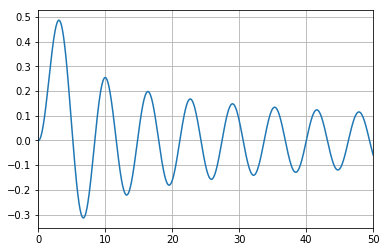

In [4]:
N = 1000
x = np.linspace(0,50,N)
y = np.zeros(N)
n = 2
for i in range(0,N):
    y[i] = bessel(x[i],n)
plt.plot(x,y)
plt.grid(True), plt.xlim([0,50])
plt.show()

Let's compare with the SciPy implementation of the Bessel function (see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jv.html#scipy.special.jv)).

In [5]:
import scipy.special as sps

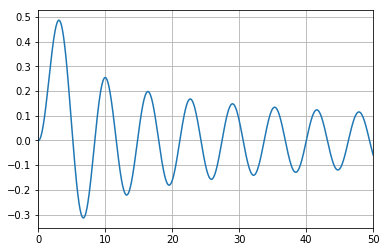

In [6]:
N = 1000
x = np.linspace(0,50,N)
y = sps.jv(2,x)
plt.plot(x,y)
plt.grid(True), plt.xlim([0,50])
plt.show()

Success! Our function produces (approximately) the same values.